In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


import os
import time,datetime
import math

In [2]:
def plot_azimuthal_profile_data(base_path,data_filename,output_fig_filename,ax1,label1='comet profile',color1='black'):
    print('{:s} - Plotting azimuthal profile for {:s}...'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S'),base_path+data_filename))
    
    azimuth_angle = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(0))
    norm_flux     = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(8))
    flux_stdev    = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(9))
    azimuth_angle = np.append(azimuth_angle,azimuth_angle[0]+360)
    norm_flux     = np.append(norm_flux,norm_flux[0])
    flux_stdev    = np.append(flux_stdev,flux_stdev[0])

    linewidth=1
    size=3
    profile   = ax1.scatter(azimuth_angle,norm_flux,color=color1,ls='--',marker='o',s=size,lw=linewidth#,label=label1
                            ,zorder=4)
    profile   = ax1.errorbar(azimuth_angle,norm_flux,yerr=flux_stdev,fmt='o',ms=size,lw=linewidth,capsize=1.5,
                             capthick=1.5,color=color1,ecolor=color1,mec='#000000',zorder=5,label=label1)
    zero_ref  = ax1.plot([-10,400],[0,0],ls=':',lw=1,zorder=1,color='#000000')
 
    ax1.set_xlim([-5,365])
    ax1.set_ylim([-5*max(flux_stdev),5*max(flux_stdev)])
 
    print('{:s} - Azimuthal profile plot written to {:s}.'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S'),base_path+output_fig_filename))
    
    return None

In [3]:
def plot_azimuthal_profile_data_stars(base_path,data_filename,output_fig_filename,ax1,label1='comet profile',color1='black'):
    print('{:s} - Plotting azimuthal profile for {:s}...'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S'),base_path+data_filename))
    linewidth=1
    azimuth_angle = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(0))
    norm_flux     = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(8))
    flux_stdev    = np.genfromtxt(base_path+data_filename,skip_header=1,usecols=(9))
    azimuth_angle = np.append(azimuth_angle,azimuth_angle[0]+360)
    norm_flux     = np.append(norm_flux,norm_flux[0])
    flux_stdev    = np.append(flux_stdev,flux_stdev[0])


    profile   = ax1.plot(azimuth_angle,norm_flux,color=color1,ls='--',lw=linewidth#,label=label1
                            ,zorder=4,label=label1)

    zero_ref  = ax1.plot([-10,400],[0,0],ls=':',lw=1,zorder=1,color='#000000')
    error_top = norm_flux+flux_stdev
    error_bottom=norm_flux-flux_stdev

    ax1.fill_between(azimuth_angle,error_bottom,error_top,color=color1,zorder=0,alpha=0.2,
                    label='Stars Uncertainty')
    
  
    ax1.set_xlim([-5,365])
    ax1.set_ylim([-5*max(flux_stdev),5*max(flux_stdev)])

    print('{:s} - Azimuthal profile plot written to {:s}.'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S'),base_path+output_fig_filename))
    
    return None

2024-11-14 13:16:55 - Plotting azimuthal profile for ./darkcomets.hyperstack.median.obj.bgsub.rot.as.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt...
2024-11-14 13:16:55 - Azimuthal profile plot written to ./darkcomets.hyperstack.median.obj.bgsub.rot.as.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf.
2024-11-14 13:16:55 - Plotting azimuthal profile for ./darkcomets.hyperstack.median.star.bgsub.rot.as.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt...
2024-11-14 13:16:55 - Azimuthal profile plot written to ./darkcomets.hyperstack.median.star.bgsub.rot.as.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf.
2024-11-14 13:16:55 - Plotting azimuthal profile for ./darkcomets.hyperstack.median.obj.bgsub.rot.nhv.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt...
2024-11-14 13:16:55 - Azimuthal profile plot written to ./darkcomets.hyperstack.median.obj.bgsub.rot.nhv.0_azimuthal_profile_diagram_in5.00as_out15.

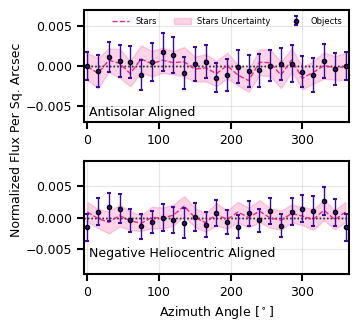

In [4]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 1, tight_layout=False,figsize=(8.7*cm,8.7*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': 0.3})

base_path = './'

data_filename_obj_as   = 'darkcomets.hyperstack.median.obj.bgsub.rot.as.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt'
data_filename_star_as  = 'darkcomets.hyperstack.median.star.bgsub.rot.as.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt'
data_filename_obj_nhv  = 'darkcomets.hyperstack.median.obj.bgsub.rot.nhv.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt'
data_filename_star_nhv = 'darkcomets.hyperstack.median.star.bgsub.rot.nhv.0_azprofile_in5.00as_out15.00as_15deg_strt00deg_median.txt'

plot_filename_obj_as   = 'darkcomets.hyperstack.median.obj.bgsub.rot.as.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf'
plot_filename_star_as  = 'darkcomets.hyperstack.median.star.bgsub.rot.as.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf'
plot_filename_obj_nhv  = 'darkcomets.hyperstack.median.obj.bgsub.rot.nhv.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf'
plot_filename_star_nhv = 'darkcomets.hyperstack.median.star.bgsub.rot.nhv.0_azimuthal_profile_diagram_in5.00as_out15.00as_15deg_strt00deg_median.pdf'

plot_azimuthal_profile_data(base_path,data_filename_obj_as,plot_filename_obj_as,axs[0],label1='Objects',
                           color1='#3a0ca3')
plot_azimuthal_profile_data_stars(base_path,data_filename_star_as,plot_filename_star_as,axs[0],label1='Stars',
                           color1='#f72585')

plot_azimuthal_profile_data(base_path,data_filename_obj_nhv,plot_filename_obj_nhv,axs[1],label1='Objects',
                           color1='#3a0ca3')
plot_azimuthal_profile_data_stars(base_path,data_filename_star_nhv,plot_filename_star_nhv,axs[1],label1='Stars',
                           color1='#f72585')
axs[0].grid(alpha=0.3)
axs[1].grid(alpha=0.3)

axs[0].set_ylim(-0.007,0.007)

fs2=9
axs[0].annotate(r'Antisolar Aligned',(2.1,-0.0062),rotation=0,fontsize=fs2)

axs[1].annotate(r'Negative Heliocentric Aligned',(2.1,-0.0062),rotation=0,fontsize=fs2)

axs[0].legend(fancybox=True, framealpha=1, 
           shadow=False, borderpad=.3,#bbox_to_anchor=(.85,.01356),
           frameon=False, loc='upper right', ncol=3,prop={'size': 6},facecolor='none')
fs=9
axs[1].set_xlabel(r'Azimuth Angle [$^\circ$]',fontsize=fs)
fig.text(-0.09, 0.5, 'Normalized Flux Per Sq. Arcsec', va='center', rotation='vertical',fontsize=fs)

plt.savefig('Figure8_AzimuthalProfiles_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)

